# Hamza

Sulfur_Concentration	Exploration_Missions	Biological_Research_Units	Offspring_Colonies	Cultural_Exchange_Programs	Military_Engagements	Inhabitants_Disputes	Resource_Mining_Operations	Resource_Allocation_Credits	Young_Colonies

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
from scipy.stats import bernoulli, gamma, norm, lognorm

In [4]:
title = 'alien_galaxy.csv'
df = pd.read_csv(title)
df.head()

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Galactic_Trade_Revenue,Alien_Civilization_Level,Interstellar_Contact_Cost,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,78285.0,10.0,Married,98.55,3118.0,NaN,11.0,Master,3.0,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,62772.0,10.0,Single,66.36,3099.0,0.0,11.0,Master,3.0,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,69016.0,5.0,Married,25.23,3100.0,0.0,11.0,Graduation,3.0,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,43795.0,NaN,Together,44.59,3098.0,1.0,11.0,Master,3.0,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,57957.0,8.0,Together,90.67,3089.0,0.0,11.0,Graduation,3.0,4.0


In [5]:
#Make a copy of the dataframe, as such we can always go back easily
df_in_progress = df.drop(['Planet_ID', 'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost'], axis=1)
df_in_progress

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,0.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,0.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,0.0,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,0.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,0.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,0.0,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,27-11-2029,NaN,5.0,...,0.0,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,28-09-2029,61.0,4.0,...,NaN,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,01-10-2029,197.0,4.0,...,0.0,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0


In [18]:
# Convert discovery_date to timestamp format and afterwards we standardize it, this way we can plot it easily.
df_in_progress['Discovery_Date'] = pd.to_datetime(df_in_progress['Discovery_Date'], errors='coerce')

df_in_progress['Discovery_Date'] = df_in_progress['Discovery_Date'].apply(
    lambda x: int(x.timestamp()) if pd.notnull(x) else None
)
df_in_progress['Discovery_Date'] = (df_in_progress['Discovery_Date']-np.mean(df_in_progress['Discovery_Date'])) / np.std(df_in_progress['Discovery_Date'])

df_in_progress

/var/folders/5n/1j1nfcz16t18tvkmwd2dfpnh0000gn/T/ipykernel_5832/1486550972.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_in_progress['Discovery_Date'] = pd.to_datetime(df_in_progress['Discovery_Date'], errors='coerce')


,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,1.099819,391.0,3.0,...,0.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,-0.892005,NaN,2.0,...,0.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,-0.396243,363.0,5.0,...,0.0,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,0.915553,53.0,7.0,...,0.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,0.204814,177.0,3.0,...,0.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,0.0,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,0.700577,NaN,5.0,...,0.0,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,0.437340,61.0,4.0,...,NaN,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,0.450502,197.0,4.0,...,0.0,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0


In [6]:
def perform_graphical_analysis(plots_per_row, columns):

    for i in range(0, len(columns), plots_per_row):
        remaining_columns = len(columns) - i
        
        if remaining_columns == 2:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        elif remaining_columns == 1:
            fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        else:
            fig, axes = plt.subplots(1, plots_per_row, figsize=(18, 6))
        
        for j, column in enumerate(columns[i:i+plots_per_row]):
            if remaining_columns == 1:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_in_progress[column], ax=ax)
                    ax.set_title(f'Count plot of {column} (binary)')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Count')
                else:
                    sns.histplot(df_in_progress[column], kde=True, ax=ax)
                    ax.set_title(f'Distribution of {column}')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Frequency')
            else:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_in_progress[column], ax=axes[j])
                    axes[j].set_title(f'Count plot of {column} (binary)')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Count')
                else:
                    sns.histplot(df_in_progress[column], kde=True, ax=axes[j])
                    axes[j].set_title(f'Distribution of {column}')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

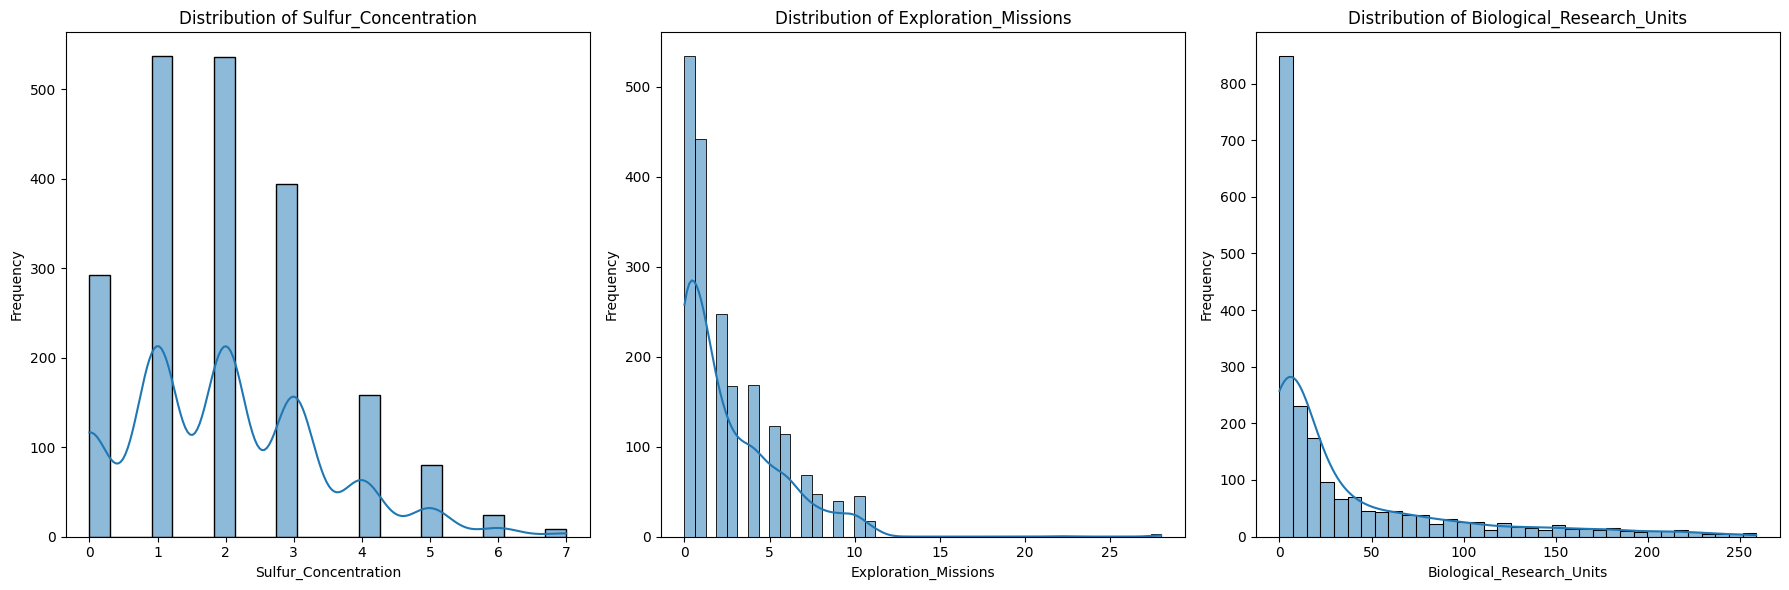

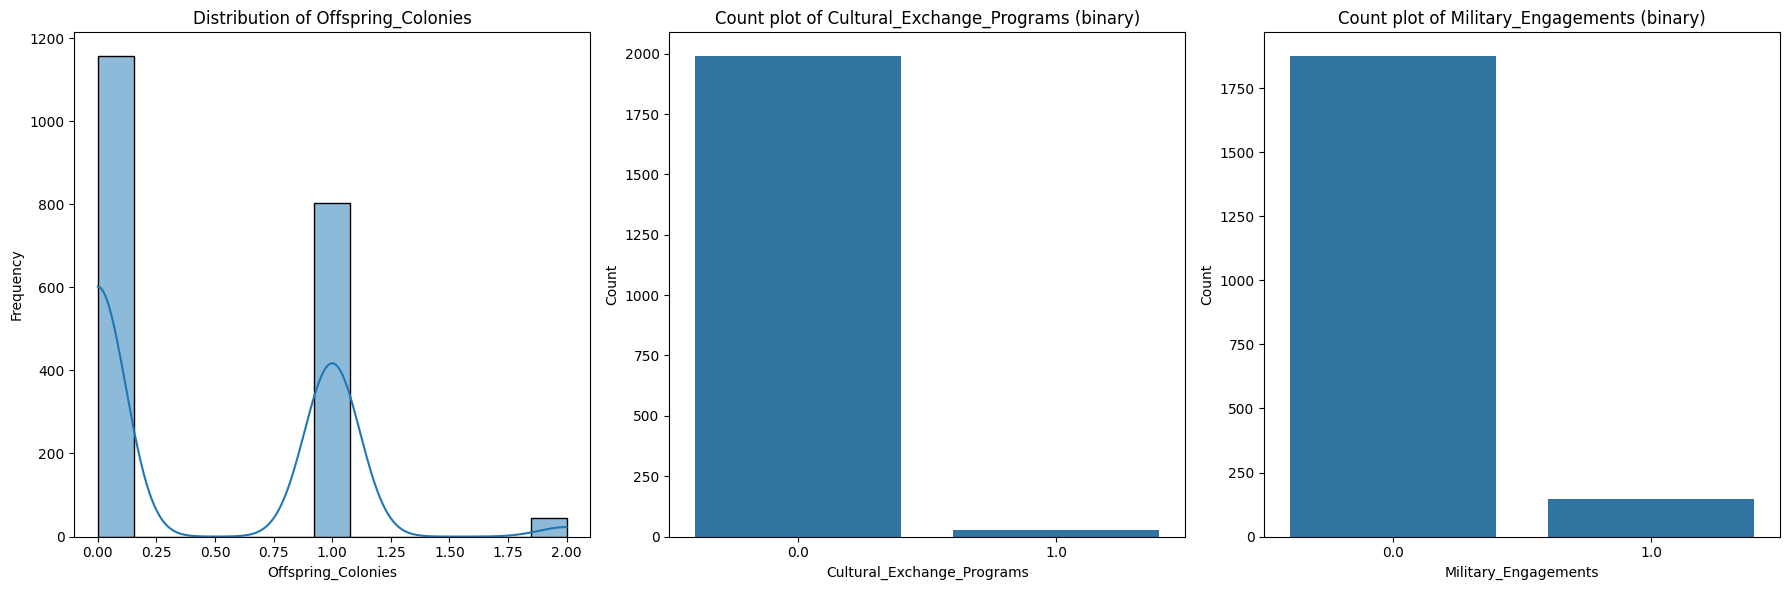

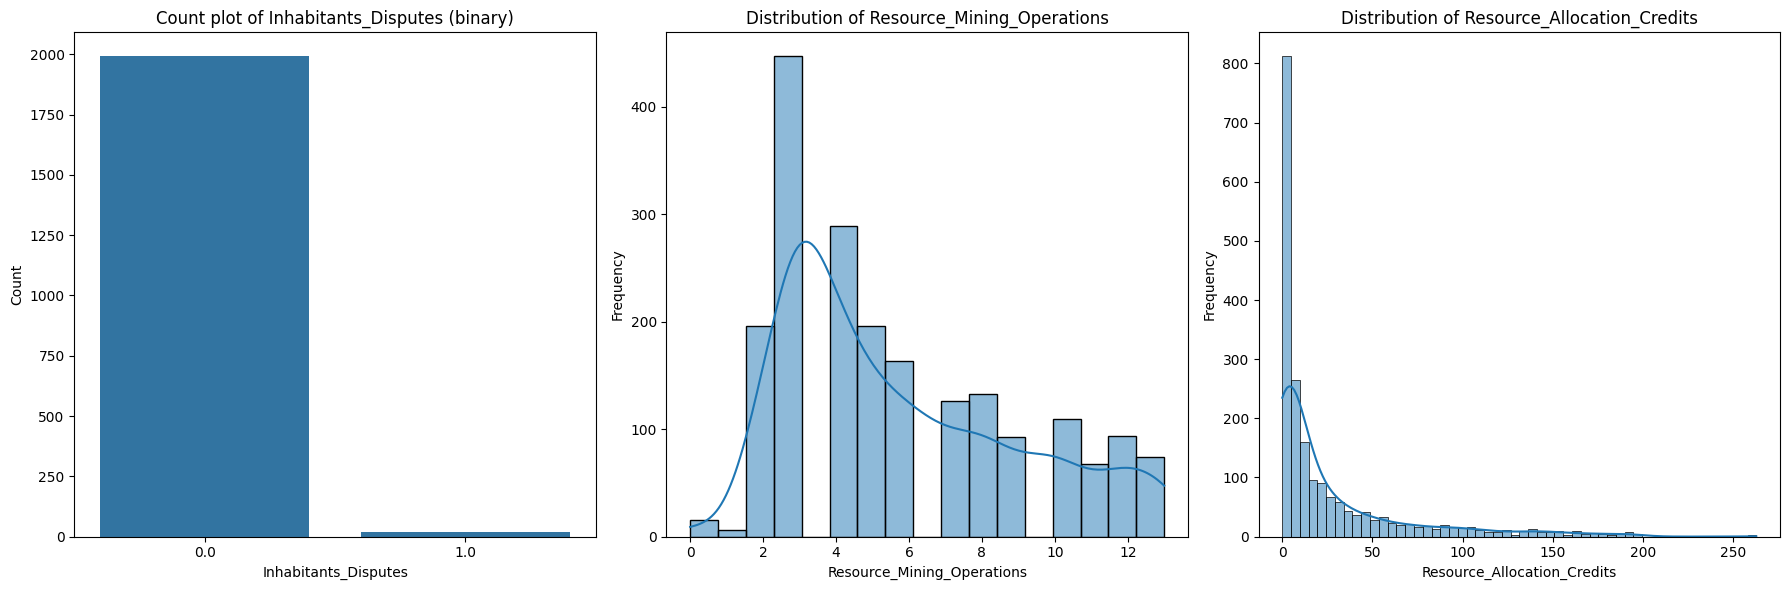

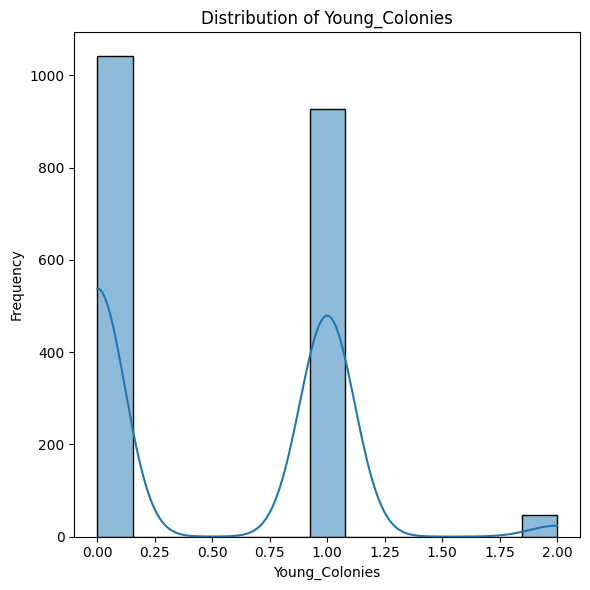

In [7]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 3
columns = ['Sulfur_Concentration', 'Exploration_Missions', 'Biological_Research_Units',
    'Offspring_Colonies', 'Cultural_Exchange_Programs', 'Military_Engagements',
    'Inhabitants_Disputes', 'Resource_Mining_Operations', 'Resource_Allocation_Credits',
    'Young_Colonies',
       ]
perform_graphical_analysis(plots_per_row, columns)

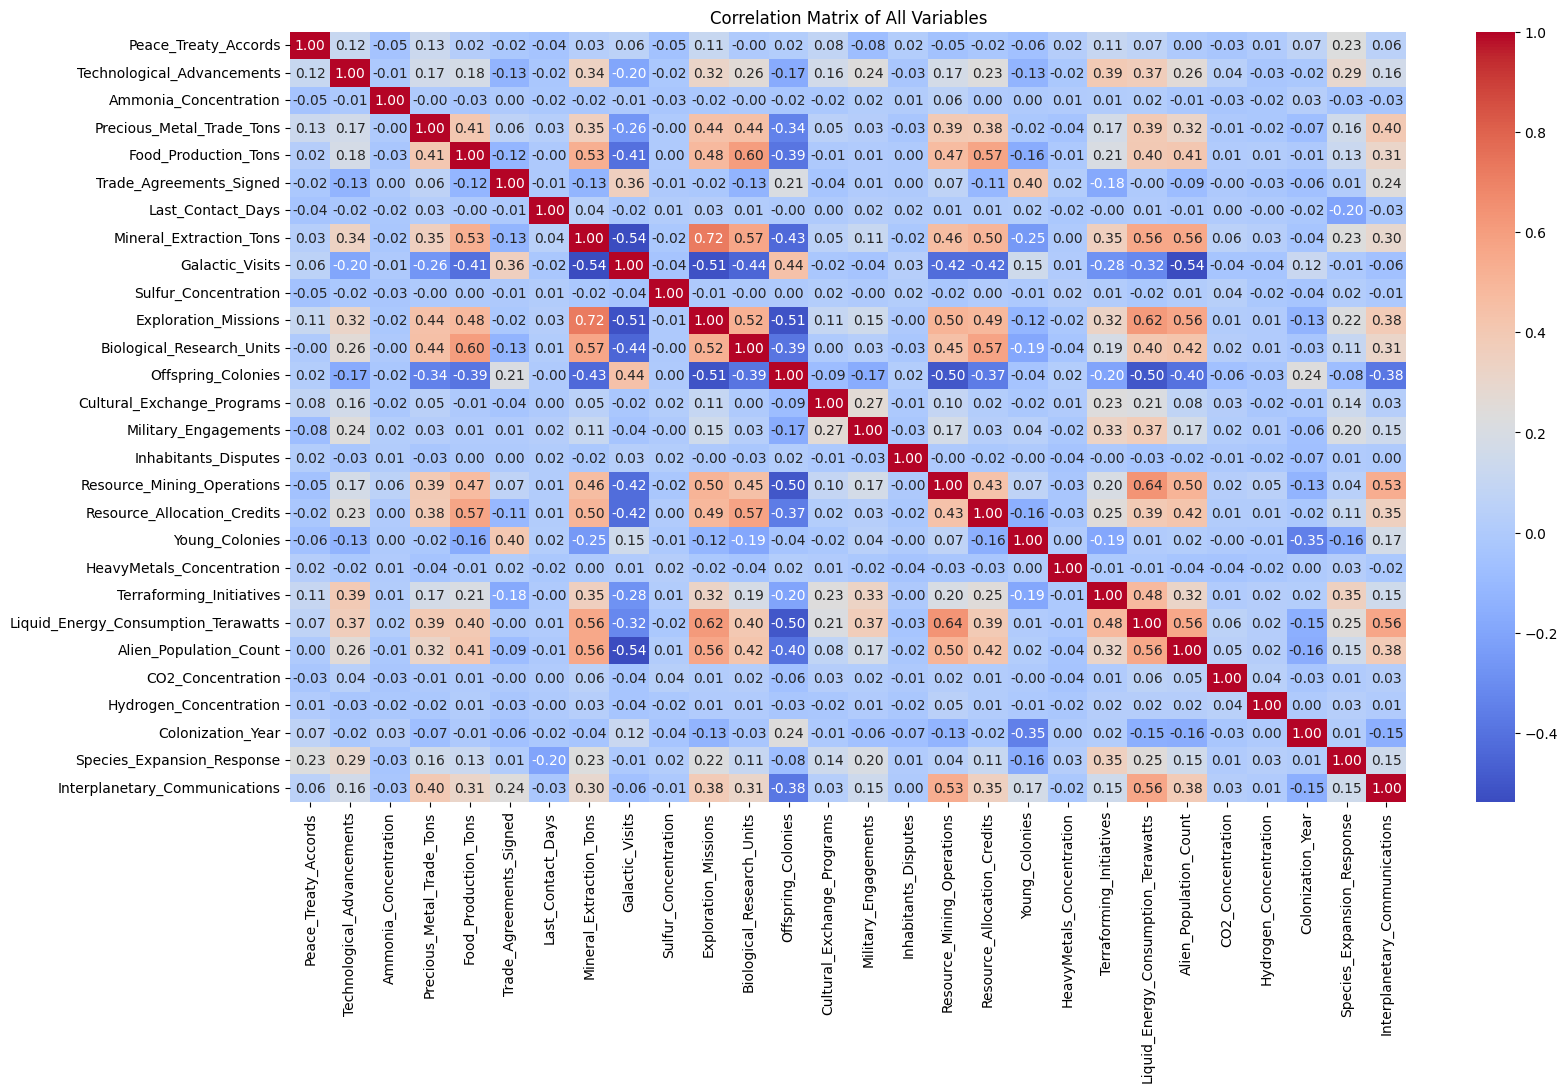

In [14]:
numeric_data = df_in_progress.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of All Variables")
plt.show()

In [21]:
#Function to calculate and save the biggest correlations. Since we don't pay attention to correlations when filling up the missing values we can see here how big the difference is.
def high_correlations(df, threshold=0.5):
    # Select only numeric columns to avoid issues with non-numeric data
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()
    
    result = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                result.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': abs(corr_value)
                })
    
    # Convert the result to a DataFrame if it's not empty, else return an empty DataFrame
    if result:
        correlation_df = pd.DataFrame(result).sort_values(by='Correlation', ascending=False).reset_index(drop=True)
    else:
        correlation_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Correlation'])
    
    return correlation_df

In [22]:
# call the correlation caluculation function
correlation_df = high_correlations(df_in_progress)
correlation_df

,Variable 1,Variable 2,Correlation
0,Mineral_Extraction_Tons,Exploration_Missions,0.723468
1,Resource_Mining_Operations,Liquid_Energy_Consumption_Terawatts,0.639129
2,Exploration_Missions,Liquid_Energy_Consumption_Terawatts,0.615159
3,Food_Production_Tons,Biological_Research_Units,0.599803
4,Biological_Research_Units,Resource_Allocation_Credits,0.574609
5,Food_Production_Tons,Resource_Allocation_Credits,0.569224
6,Mineral_Extraction_Tons,Biological_Research_Units,0.567399
7,Exploration_Missions,Alien_Population_Count,0.564253
8,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.562423
9,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.558047


In [12]:
# Checking if the specified columns exist in the dataframe and creating a subset
df_selected = df[[col for col in columns if col in df.columns]]

# Displaying the first few rows of the subset to confirm the selected columns
df_selected.head()

,Sulfur_Concentration,Exploration_Missions,Biological_Research_Units,Offspring_Colonies,Cultural_Exchange_Programs,Military_Engagements,Inhabitants_Disputes,Resource_Mining_Operations,Resource_Allocation_Credits,Young_Colonies
0,0.0,4.0,175.0,0.0,0.0,0.0,0.0,NaN,67.0,0.0
1,3.0,6.0,43.0,0.0,NaN,NaN,0.0,11.0,8.0,1.0
2,NaN,9.0,123.0,0.0,NaN,0.0,0.0,13.0,107.0,1.0
3,2.0,3.0,4.0,0.0,0.0,1.0,NaN,4.0,3.0,1.0
4,2.0,6.0,77.0,0.0,0.0,0.0,1.0,8.0,5.0,1.0


In [13]:
missing_values = df_selected.isna().sum()
missing_values

Sulfur_Concentration           209
Exploration_Missions           222
Biological_Research_Units      209
Offspring_Colonies             238
Cultural_Exchange_Programs     224
Military_Engagements           220
Inhabitants_Disputes           229
Resource_Mining_Operations     231
Resource_Allocation_Credits    200
Young_Colonies                 226
dtype: int64

In [23]:
# Checking unique values for each column to determine suitable distributions for imputation
unique_values = {col: df_selected[col].dropna().unique() for col in df_selected.columns}
unique_values

{'Sulfur_Concentration': array([0., 3., 2., 1., 4., 5., 6., 7.]),
 'Exploration_Missions': array([ 4.,  6.,  9.,  3.,  0.,  2.,  1.,  8.,  5.,  7., 10., 28., 11.,
        22.]),
 'Biological_Research_Units': array([175.,  43., 123.,   4.,  77.,   0.,  11.,  36.,   3.,   6.,   2.,
        207.,  21., 136., 223.,   7., 104.,  16.,  30.,  15.,  34.,  45.,
          8.,  32., 130.,  63., 180.,  71.,  84., 179.,  17.,  91., 124.,
         40., 192.,  23.,  69., 151.,  28.,  80., 142.,  20.,  50., 120.,
         98.,  56.,  78., 246.,  12., 159.,  76., 138., 150.,  75., 129.,
        160.,  25., 205.,  62.,  39., 137.,  10.,  24., 166.,   1.,  64.,
         33., 231.,  26.,  94.,  67.,  19.,  48., 125., 145.,  86.,  29.,
        153.,  13., 134.,  42., 168.,  37., 149.,  46.,  65.,  49., 188.,
         93., 111.,  38., 184.,  85.,  52., 182.,  95., 106.,  90.,  61.,
         73., 202.,  58.,  51., 140.,  99., 133., 172., 169., 212.,  72.,
         59., 216.,  82., 181.,  54., 141., 132.,  60

In [25]:
def impute_with_bernoulli(df, column_name):
    data_column = df[column_name].copy()
    p_success = data_column.mean()
    nan_indices = data_column.isna()
    samples = bernoulli(p_success).rvs(size=nan_indices.sum())
    data_column.loc[nan_indices] = samples
    df[column_name] = data_column
    return df

def impute_with_multinomial(df, column_name):
    column_data = df[column_name]
    non_nan_data = column_data.dropna()
    value_counts = non_nan_data.value_counts(normalize=True).sort_index()
    possible_values = np.arange(int(non_nan_data.min()), int(non_nan_data.max()) + 1)
    probs = [value_counts.get(value, 0) for value in possible_values]
    nan_indices = column_data[column_data.isna()].index
    sampled_values = np.random.choice(possible_values, size=len(nan_indices), p=probs)
    df.loc[nan_indices, column_name] = sampled_values
    return df

def impute_with_gamma(df, column_name):
    observed_data = df[column_name].dropna()
    shape, loc, scale = gamma.fit(observed_data)
    num_missing = df[column_name].isna().sum()
    imputed_values = gamma.rvs(shape, loc=loc, scale=scale, size=num_missing).astype(int)
    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values
    return df

In [27]:
# Bernoulli distribution for binary columns
binary_columns = ['Cultural_Exchange_Programs', 'Military_Engagements', 'Inhabitants_Disputes']
for col in binary_columns:
    df_selected = impute_with_bernoulli(df_selected, col)
df_in_progress.isna().sum()[:10]

/var/folders/5n/1j1nfcz16t18tvkmwd2dfpnh0000gn/T/ipykernel_5832/2411023353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = data_column


Peace_Treaty_Accords          235
Technological_Advancements    212
Ammonia_Concentration         217
Precious_Metal_Trade_Tons     215
Food_Production_Tons          246
Trade_Agreements_Signed       207
Last_Contact_Days             234
Discovery_Date                226
Mineral_Extraction_Tons       208
Galactic_Visits               220
dtype: int64

In [28]:
# Multinomial distribution for discrete categories
multinomial_columns = ['Offspring_Colonies', 'Resource_Mining_Operations', 'Young_Colonies']
for col in multinomial_columns:
    df_selected = impute_with_multinomial(df_selected, col)
df_in_progress.isna().sum()[:10]

Peace_Treaty_Accords          235
Technological_Advancements    212
Ammonia_Concentration         217
Precious_Metal_Trade_Tons     215
Food_Production_Tons          246
Trade_Agreements_Signed       207
Last_Contact_Days             234
Discovery_Date                226
Mineral_Extraction_Tons       208
Galactic_Visits               220
dtype: int64

In [29]:
gamma_columns = ['Sulfur_Concentration', 'Exploration_Missions', 'Biological_Research_Units', 'Resource_Allocation_Credits']
for col in gamma_columns:
    df_selected = impute_with_gamma(df_selected, col)
df_in_progress.isna().sum()[:10]

Peace_Treaty_Accords          235
Technological_Advancements    212
Ammonia_Concentration         217
Precious_Metal_Trade_Tons     215
Food_Production_Tons          246
Trade_Agreements_Signed       207
Last_Contact_Days             234
Discovery_Date                226
Mineral_Extraction_Tons       208
Galactic_Visits               220
dtype: int64

In [30]:
# Check remaining missing values to confirm imputation
remaining_missing = df_selected.isna().sum()
remaining_missing

Sulfur_Concentration           0
Exploration_Missions           0
Biological_Research_Units      0
Offspring_Colonies             0
Cultural_Exchange_Programs     0
Military_Engagements           0
Inhabitants_Disputes           0
Resource_Mining_Operations     0
Resource_Allocation_Credits    0
Young_Colonies                 0
dtype: int64